# Time Series Analysis

### 1. EDA with Time Series Data

In [1]:
## Install Pandas Data Reader
%pip install pandas-datareader


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [20]:
import yfinance as yf

start = '2015-1-1'
end = '2020-12-31'
tsla_df = yf.download('TSLA', start=start, end=end)
tsla_df.head()

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/401881397.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_df = yf.download('TSLA', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


<Axes: xlabel='Date'>

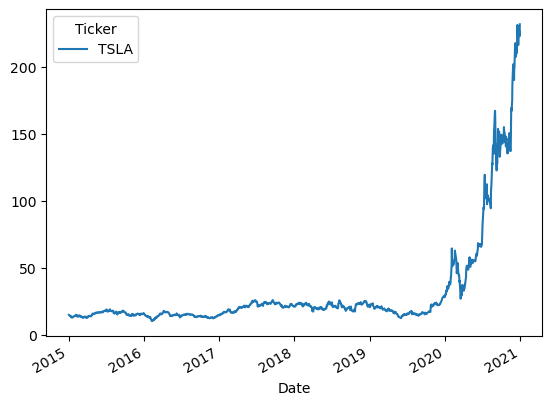

In [22]:
tsla_df['High'].plot()

<Axes: xlabel='Date'>

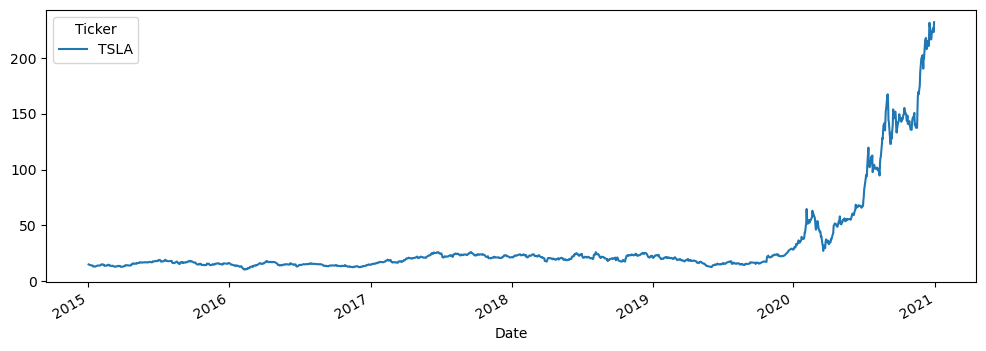

In [23]:
tsla_df['High'].plot(figsize=(12, 4))

<Axes: xlabel='Date'>

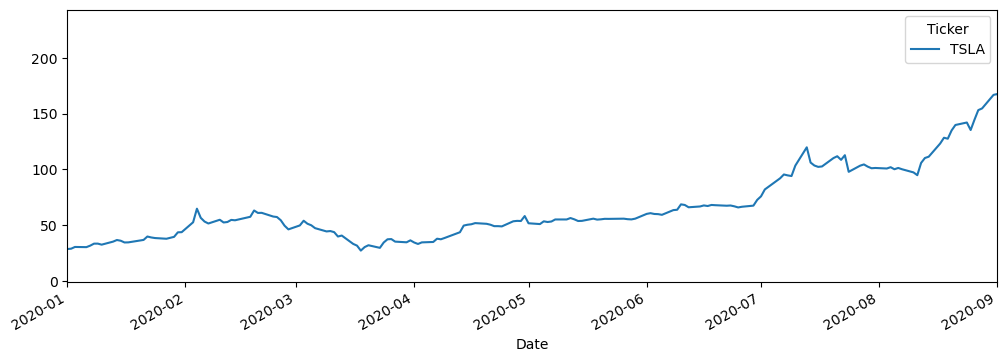

In [ ]:
# x-limit and y-limit
tsla_df['High'].plot(xlim=['2020-01-01', '2020-09-01'],figsize=(12, 4))

<Axes: xlabel='Date'>

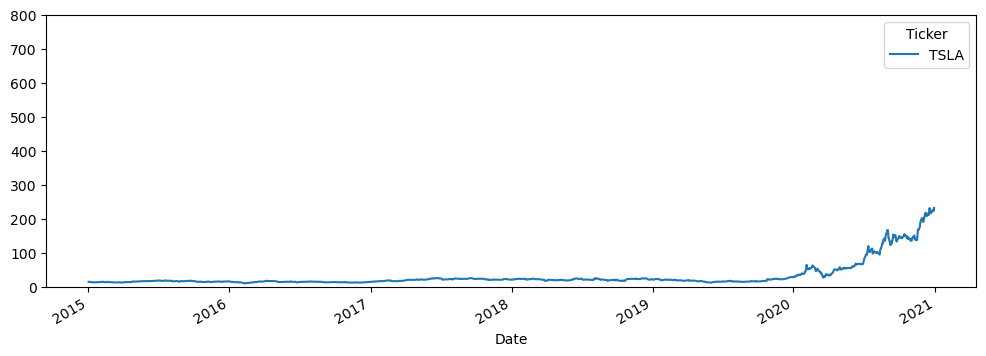

In [ ]:
# x-limit and y-limit
tsla_df['High'].plot(ylim=[0, 800],figsize=(12, 4))

In [26]:
tsla_df.loc['2020-01-01': '2020-09-01'].index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-31', '2020-09-01'],
              dtype='datetime64[ns]', name='Date', length=169, freq=None)

In [27]:
index = tsla_df.loc['2020-01-01': '2020-09-01'].index
share_open = tsla_df.loc['2020-01-01': '2020-09-01']['Open']

In [28]:
share_open

Ticker,TSLA
Date,
2020-01-02,28.299999
2020-01-03,29.366667
2020-01-06,29.364668
2020-01-07,30.760000
2020-01-08,31.580000
...,...
2020-08-26,137.333328
2020-08-27,145.363998
2020-08-28,153.007996


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

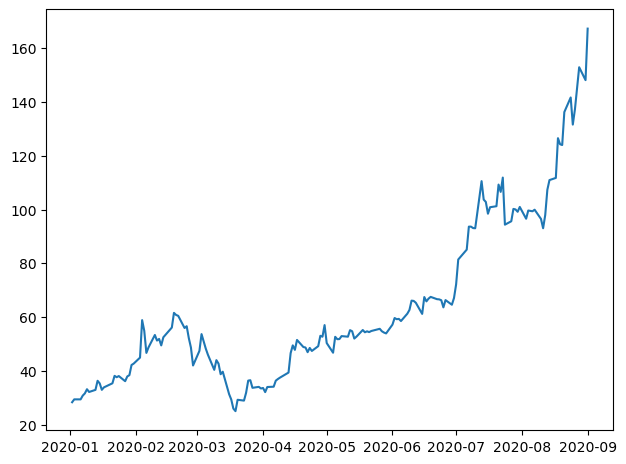

In [32]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate
axis.plot(index, share_open)
plt.show();

In [33]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2015-01-02 to 2020-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1510 non-null   float64
 1   (High, TSLA)    1510 non-null   float64
 2   (Low, TSLA)     1510 non-null   float64
 3   (Open, TSLA)    1510 non-null   float64
 4   (Volume, TSLA)  1510 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1 KB


In [34]:
tsla_df_reset = tsla_df.reset_index()
tsla_df_reset.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [36]:
tsla_df_reset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1510 non-null   datetime64[ns]
 1   (Close, TSLA)   1510 non-null   float64       
 2   (High, TSLA)    1510 non-null   float64       
 3   (Low, TSLA)     1510 non-null   float64       
 4   (Open, TSLA)    1510 non-null   float64       
 5   (Volume, TSLA)  1510 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 70.9 KB


In [37]:
# Datetime 
from datetime import datetime

datetime(2021, 11, 21)

datetime.datetime(2021, 11, 21, 0, 0)

In [38]:
datetime.now()

datetime.datetime(2025, 7, 22, 20, 32, 50, 161853)

In [39]:
date = datetime.now()

In [40]:
date.day

22

In [41]:
date.month

7

In [42]:
date.second

25

In [44]:
date.weekday()

1

In [45]:
date.year

2025

## Time Resampling

In [47]:
tsla_df.resample(rule='A')

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2049042004.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla_df.resample(rule='A')


In [48]:
tsla_df.resample(rule='A').min()


/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2340290554.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla_df.resample(rule='A').min()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-12-31,12.333333,12.619333,12.093333,12.388667,10620000
2016-12-31,9.578000,10.331333,9.403333,9.488000,24892500
2017-12-31,14.466000,14.688667,14.064000,14.316667,32800500
2018-12-31,16.704000,17.355333,16.306000,16.851999,46210500
2019-12-31,11.931333,12.445333,11.799333,12.073333,36984000
2020-12-31,24.081333,26.990667,23.367332,24.980000,52073100


In [50]:
## Rule A means year end frequency

tsla_df.resample(rule='A').max()


/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2843292554.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla_df.resample(rule='A').max()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-12-31,18.817333,19.110001,18.420000,18.680000,234744000
2016-12-31,17.694668,17.955999,16.967333,17.763332,356136000
2017-12-31,25.666668,25.974001,25.290001,25.779333,296871000
2018-12-31,25.304667,25.830667,24.474667,25.000000,504745500
2019-12-31,28.729334,29.020666,28.423332,29.000000,450091500
2020-12-31,231.666672,232.199997,222.786667,224.836670,914082000


/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2694412887.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla_df.resample(rule='A').max()['Open'].plot()


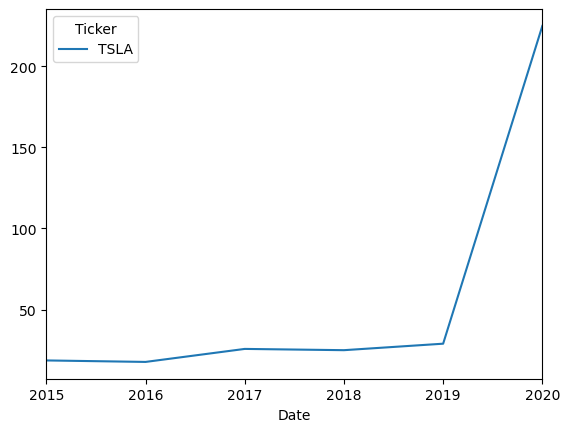

In [53]:
tsla_df.resample(rule='A').max()['Open'].plot()
plt.show();

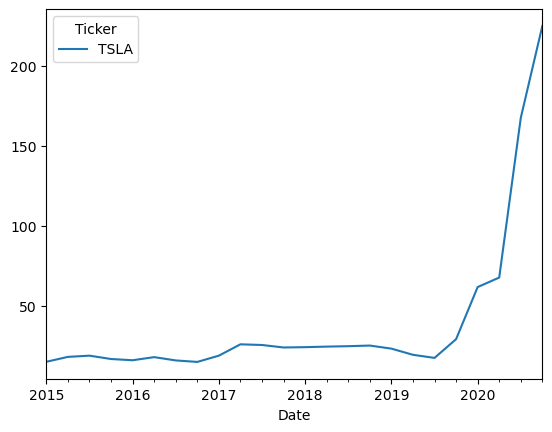

In [55]:
## QS -> Quarterly Start Frequency
tsla_df.resample(rule='QS').max()['Open'].plot()
plt.show();

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2728559487.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  tsla_df.resample(rule='BA').max()['Open'].plot()


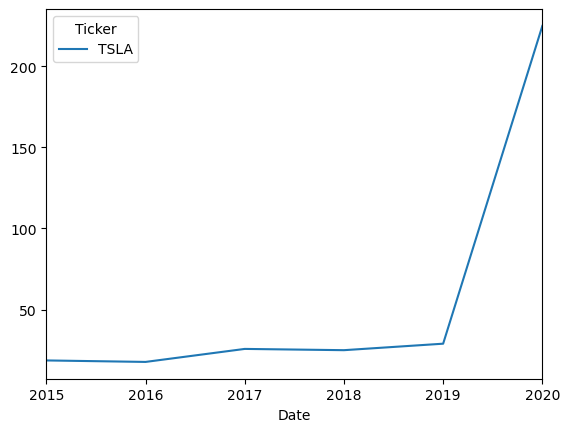

In [57]:
## BE -> Business End Frequency
tsla_df.resample(rule='BA').max()['Open'].plot()
plt.show();

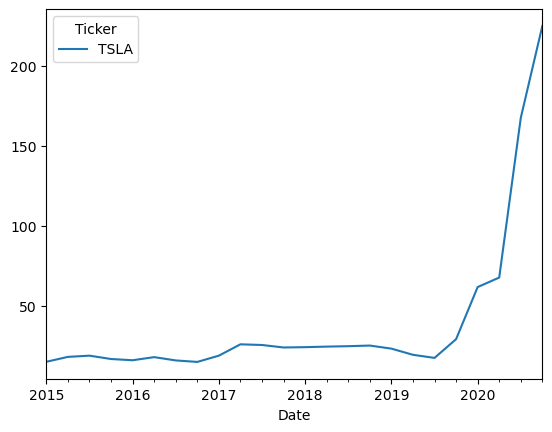

In [58]:
## BQS -> Business Quarterly Frequency
tsla_df.resample(rule='BQS').max()['Open'].plot()
plt.show();

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2394982455.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  tsla_df['Open'].resample(rule='A').mean().plot(kind='bar')


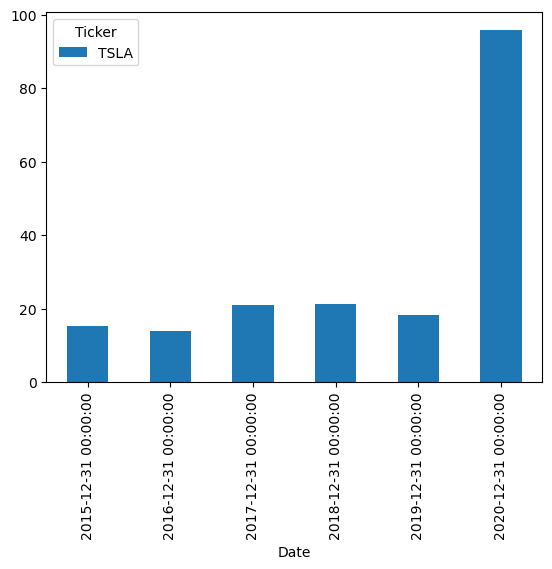

In [61]:
# Plotting
tsla_df['Open'].resample(rule='A').mean().plot(kind='bar')
plt.show();

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_22595/2206428853.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tsla_df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15, 6))


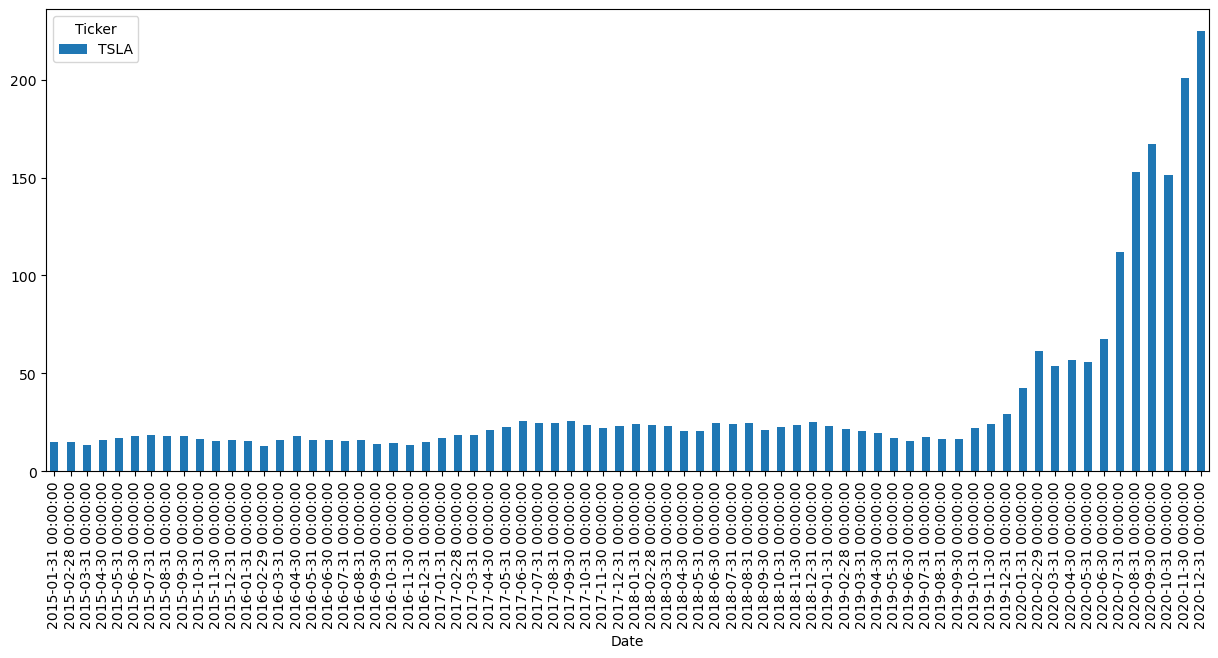

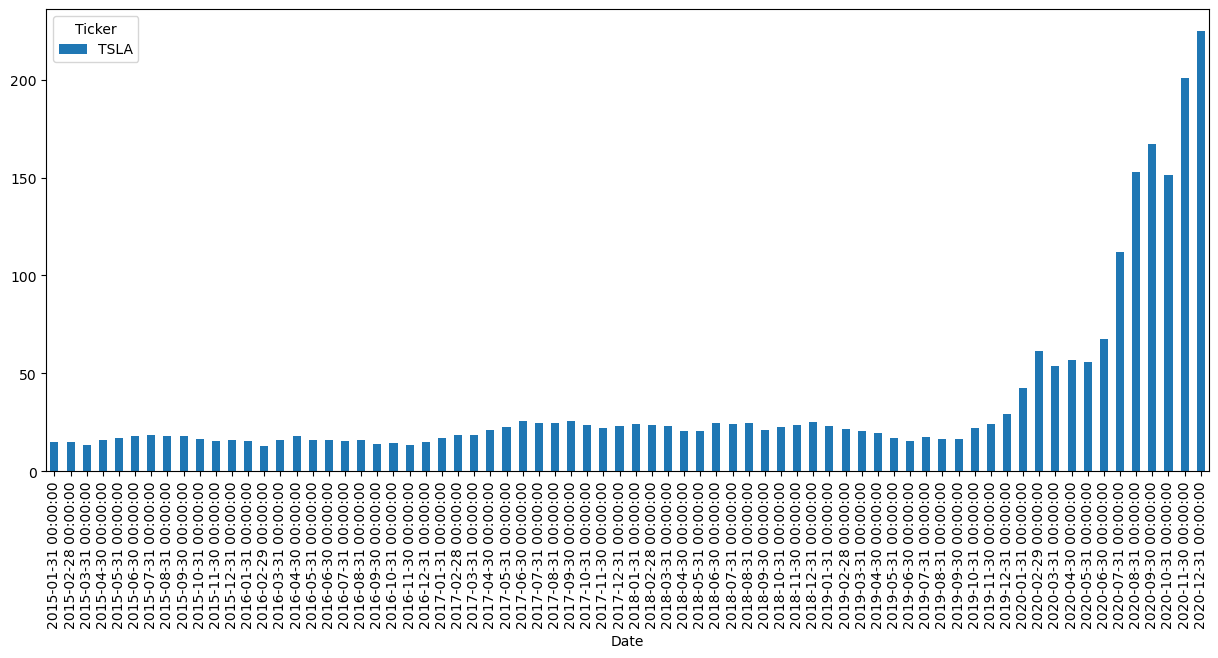

In [63]:
tsla_df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15, 6))
plt.show();

In [66]:
tsla_df['High'].rolling(10).mean().head(20)

Ticker,TSLA
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
2015-01-09,NaN
2015-01-12,NaN
2015-01-13,NaN
2015-01-14,NaN


In [67]:

tsla_df['Open:30 days rolling']=tsla_df['Open'].rolling(30).mean()

In [69]:
tsla_df.head(31)

Price,Close,High,Low,Open,Volume,Open:30 days rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,NaN
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,NaN
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,NaN
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,NaN
2015-01-09,13.777333,13.998667,13.664000,13.928000,70024500,NaN
2015-01-12,13.480667,13.631333,13.283333,13.536667,89254500,NaN
2015-01-13,13.616667,13.840667,13.394000,13.554667,67159500,NaN


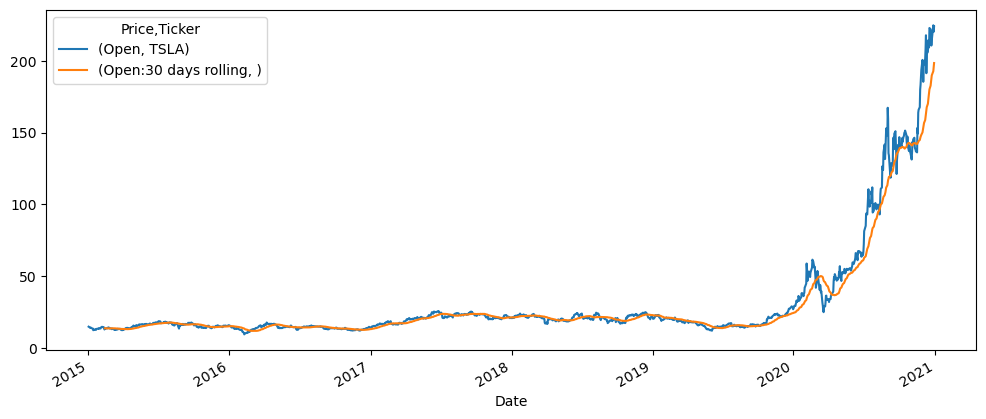

In [72]:
tsla_df[['Open', 'Open:30 days rolling']].plot(figsize=(12, 5))
plt.show();

#### Simple Moving Average

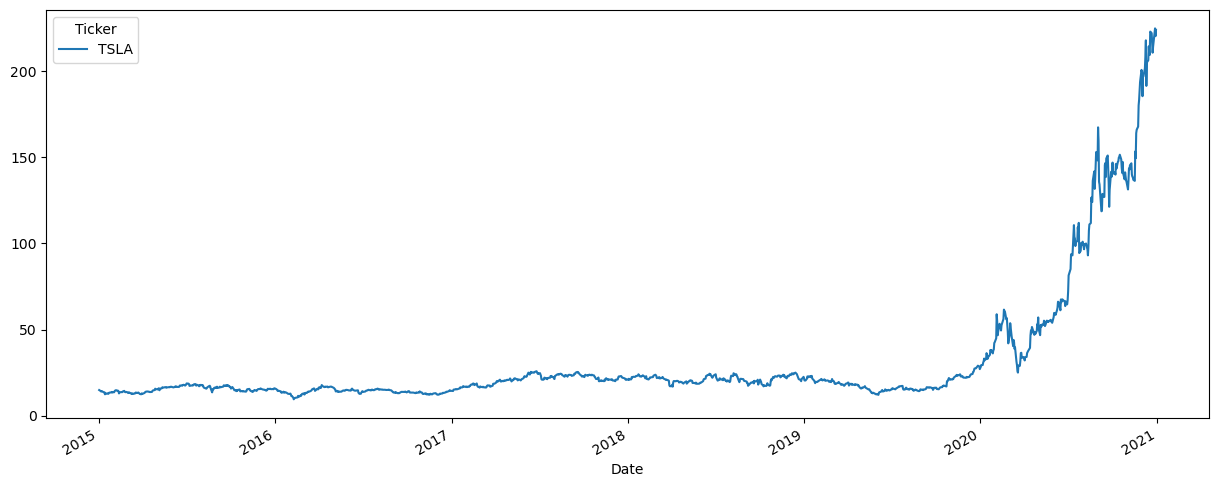

In [77]:
tsla_df['Open'].plot(figsize=(15, 6))
plt.show();

In [95]:
tsla_df['Open:30 days rolling2']=tsla_df['Open'].rolling(window=10, min_periods=1).mean()

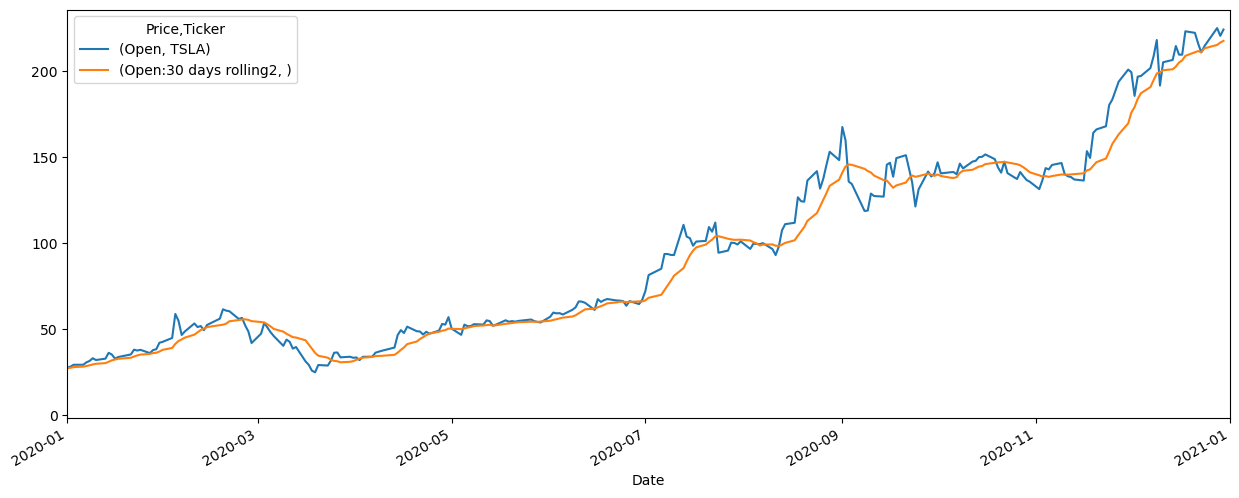

In [96]:
tsla_df[['Open', 'Open:30 days rolling2']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(15, 6));
plt.show()

In [97]:
tsla_df['Open:50 days rolling2']=tsla_df['Open'].rolling(window=20, min_periods=1).mean()


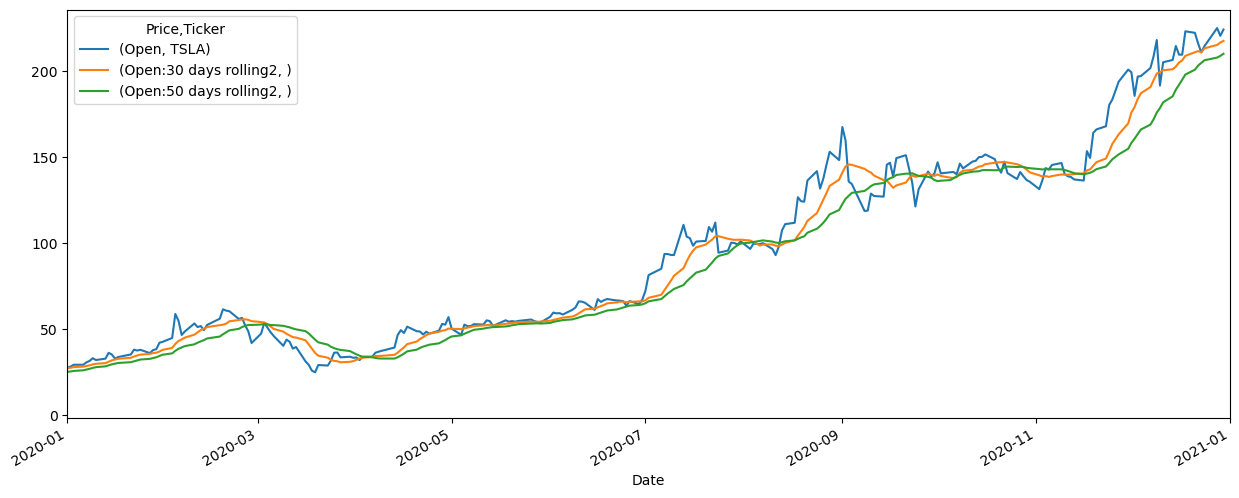

In [98]:
tsla_df[['Open', 'Open:30 days rolling2', 'Open:50 days rolling2']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(15, 6));
plt.show()

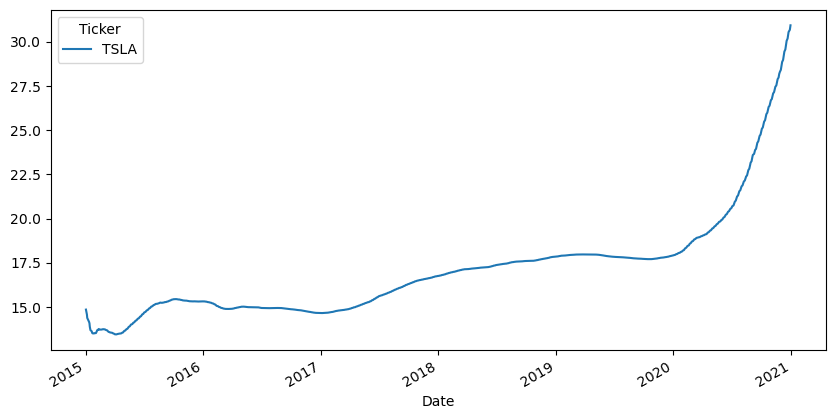

In [102]:
## Expanding - Cumulative Moving Average

tsla_df['Open'].expanding().mean().plot(figsize=(10, 5))
plt.show();

#### Exponential Weighted Moving Average (EWMA)

In [103]:
## EMA - Exponential Moving Average

tsla_df['EMA_0.1'] = tsla_df['Open'].ewm(alpha=0.1, adjust=False).mean()

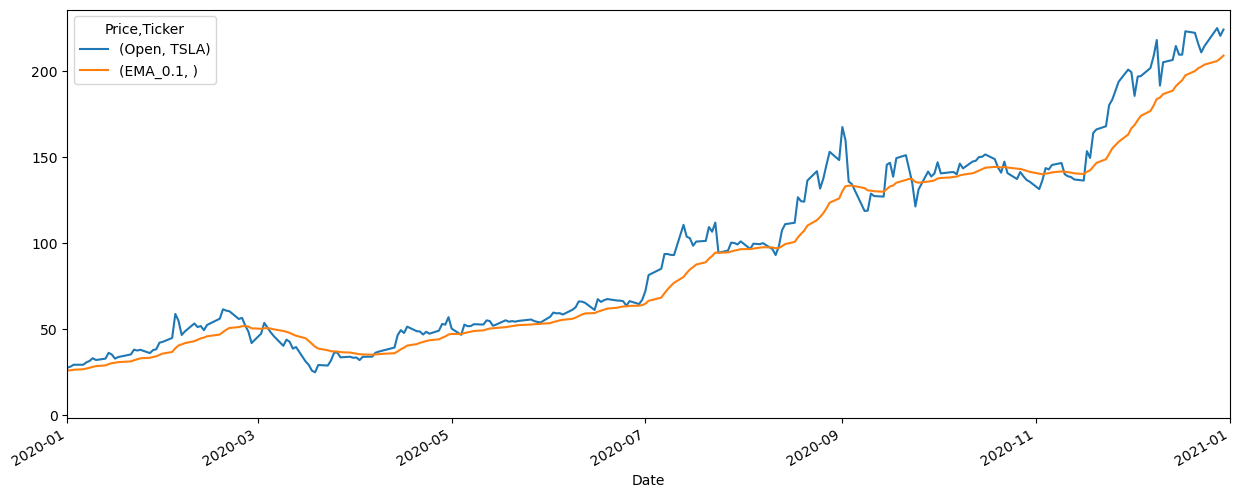

In [104]:
tsla_df[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(15, 6));
plt.show()

In [105]:
tsla_df['EMA_5days'] = tsla_df['Open'].ewm(span=5).mean()

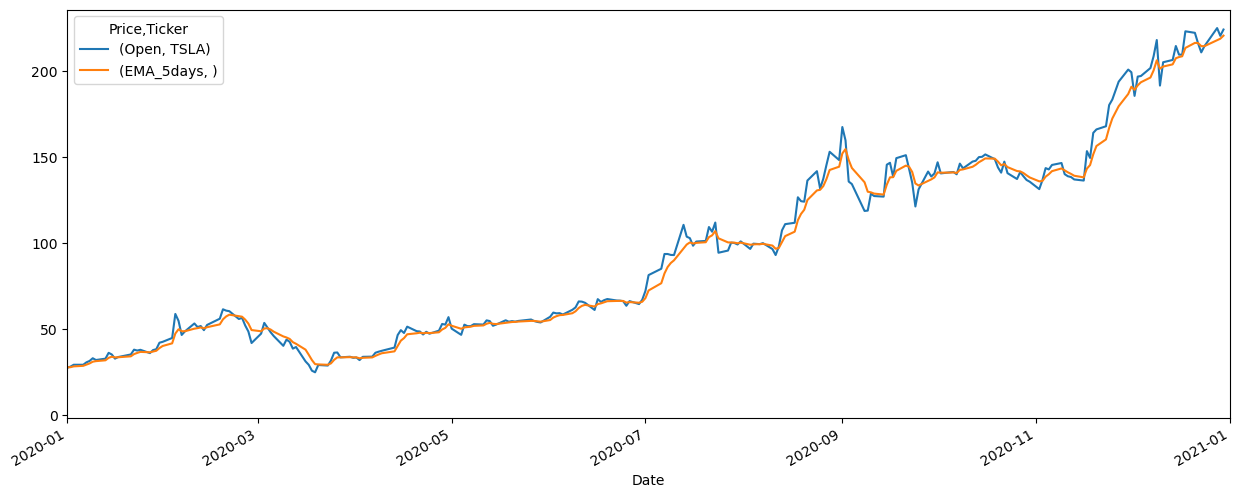

In [108]:
tsla_df[['Open', 'EMA_5days']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(15, 6));
plt.show()

## Time Series Models

In [1]:
# 1. Auto Regression

from statsmodels.tsa.ar_model import AutoReg

# Create a linear data
data = [10, 12, 14, 16, 18, 20, 20, 22]

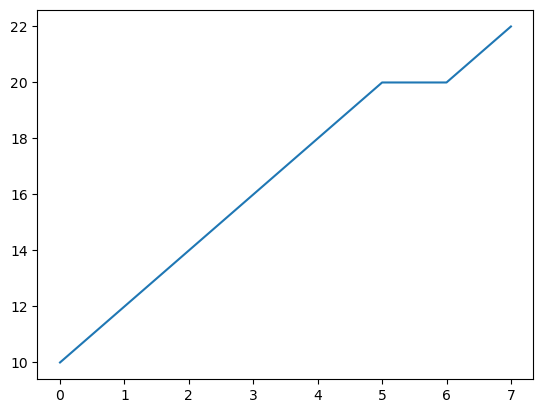

In [2]:
import matplotlib.pyplot as plt
plt.plot(data)

In [3]:
ARmodel = AutoReg(data, lags=1)
ARmodel_fit = ARmodel.fit()

In [4]:
# making predictions
ypredicted = ARmodel_fit.predict(8, 10)
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [5]:
pred_list = ypredicted.tolist()
combinedList = data + pred_list

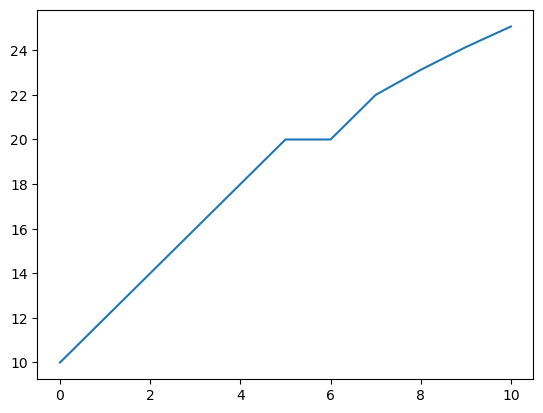

In [6]:
plt.plot(combinedList)

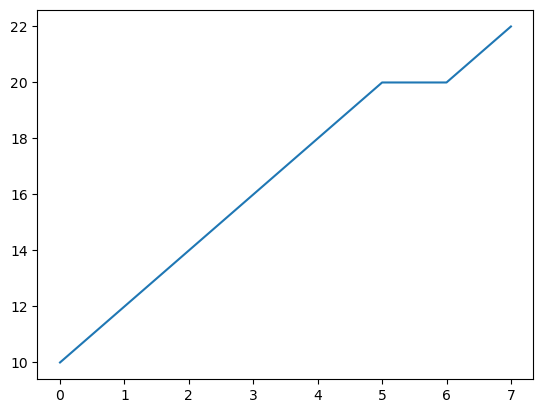

In [10]:
## 2. Moving Average

from statsmodels.tsa.arima_model import ARMA 

plt.plot(data)

In [ ]:
# fit model 
MAmodel = ARMA(data, order=(0, 1))
MAmodel_fit = MAmodel.fit(disp=False)

ypredicted_ma = MAmodel_fit.predict(8, 10)
print(ypredicted_ma)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [12]:
import pandas as pd
df = pd.read_csv('datasets/timeseries.csv')

In [13]:
df.head()

,Date,Value
0,1991-01-07,3.526591
1,1991-01-08,3.180891
2,1991-01-09,3.252221
3,1991-01-10,3.611003
4,1991-01-11,3.565869


In [15]:
# 3. Autoregressive Integrated Moving Average(ARIMA)

from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(df['Value'], order=(1, 1, 1))
ARIMAmodel_fit = ARIMAmodel.fit()

# Forecast the next 2 values
ypredicted_arima = ARIMAmodel_fit.forecast(steps=2)
print(ypredicted_arima)

204    21.203379
205    21.736449
Name: predicted_mean, dtype: float64
